<a href="https://colab.research.google.com/github/joeseeun/IT-/blob/main/IT%EC%99%80%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4%ED%98%81%EC%8B%A0_%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_8%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류 모델을 이용하여 직장 만족도에 영향을 미치는 요인 탐색하기**
IT와비즈니스혁신(002) 8조 기말 프로젝트

가족자원경영학과 2014438 김고운, 경영학부 2015442 양현서, IT공학과 1914565 오채린, 문화관광외식학부 1915683 조세은

# 📋 문제 상황

대한민국 직장인 행복 지수 조사 결과, **직장인 10명 중 4명이 직장에서 행복하지 않다**는 결과가 나왔다.
* 직장인들의 삶의 행복도와 직장 만족도 평균 점수:**43.1**점
* 직장 생활 시작과 동시에 행복도가 떨어진다
* 일을 통해 자신이 성장한다고 느끼지 못한다
https://www.joongang.co.kr/article/23570900#home  






---


> **'퇴사했지만 퇴사하지 않았습니다'**



**조용한 사직: 실제 퇴사를 하지는 않았지만 마음은 일터에서 떠나 본인이 맡은 최소한의 업무만 처리하는 태도를 뜻하는 신조어**

* 지난달 여론조사 기관 갤럽은 미국인 18세 이상 근로자 1만5000여 명을 설문조사한 결과, **"미국인 근로자 50% 이상이 사실상 ‘조용한 사직’ 중인 것으로 나타났다”**고 밝혔다.
응답자들에게 업무 몰입도를 물어본 결과 각각 ‘업무에 몰입 중’(32%), ‘큰 불만을 갖고 있다’(18%)고 답한 이들을 제외한 나머지 이들(50%)을 일에 열중하지도, 그렇다고 적극적인 불만도 없이 회사를 다니는 ‘조용한 퇴사자’들로 분석했다. 특히 **35세 미만 청년 근로자들의 취업 만족도가 떨어지고 직장에서 발전할 기회를 얻으리라 기대가 현저하게 떨어지는 것으로 나타났다**고 덧붙였다.

* 2021년 12월 채용 플랫폼 사람인이 직장인 3923명을 대상으로 ‘회사 업무와 월급의 관계’에 대해 설문한 결과, **응답자의 70%가 “딱 월급 받은 만큼만 일하면 된다”고 생각**하는 것으로 나타났다.



* 직장인의 **삶의 행복도와 직장에 대한 만족도 사이에는 높은 상관관계**(0.77)가 존재 *(대한민국 직장인 행복 지수 조사)*

→ *직장인들이 일의 의미를 느끼지 못하고, 직장 생활 중 행복도가 낮다는 것을 확인할 수 있다*

**따라서, 직장에 대한 만족도를 높여 직장 생활 중 행복도를 제고하고, 일의 의미를 느낄 수 있게 함으로써 '조용한 사직' 문제를 해결해야 할 것이다.**

# 📋 데이터셋 소개

**2020년 대졸자직업이동경로조사(GOMS)**

*   조사대상

  모집단: 2~3년제, 4년제, 교육대 대졸자 (매년 전년도 졸업자 1만 8천 명을 표본으로 추출)

*   조사목적

  대졸자의 경력개발 및 직장이동경로를 조사하여 교육․노동시장 간 인력 수급 불일치 완화를 도모하기 위한 정책수립의 기초자료를 제공

*   기대효과

  대졸자를 대상으로 교육, 훈련, 고용, 직업 간의 상관성 및 이행행태 등의 자료를 생산함으로써 교육, 훈련, 노동시장에 대한 정책 수립에 활용



# 📋 사용 변수 소개
해당 데이터셋은 1331개의 많은 칼럼이 존재함에 따라, 탐색 후 주제에 적합한 변수만 추출하여 사용


*   종속변수: g191a140 (Satistfaction) **'현 직장(일자리)에 대한 전반적인 만족도'**
    
    🔹 해당 변수 값 범위는 1~5이므로, 4점 이상일 경우 만족도가 높은 것으로 판단한다.

*   독립변수: g191sex (Gender), g191a018 (CommuteTime), g191a117 (StandardHours), g191a118 (OvertimeHours), g191a119 (HolidayWork), g191a122 (MonthlyIncome), g191a126 (SalaryLevel), g191a127 (Stability), g191a128 (Description), g191a129 (Environment), g191a130 (Time), g191a131 (SelfDevelopment), g191a132 (Relationship), g191a133 (Benefits), g191a134 (Promotion), g191a135 (JobReputation), g191a136 (Autonomy), g191a137 (CompanyReputation), g191a138 (Interest), g191a139 (Training), g191a297 (TurnoverPreparation)

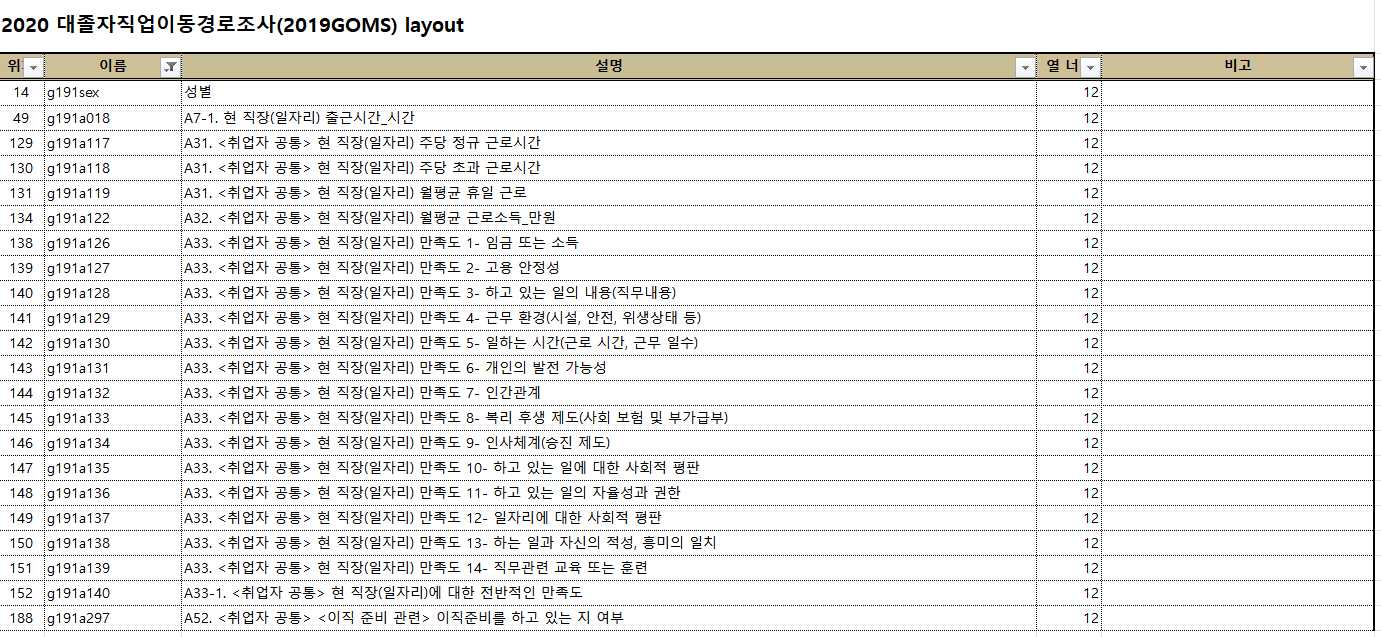

# 1. 모듈 Import, 데이터 불러오기 및 전처리

In [ ]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
import mglearn as mg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline         
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import pandas as pd
import seaborn as sns  
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/BigMining/GP_2020.csv', encoding='utf-8')

#데이터 살펴보기
print(df.head())
print(df.describe())
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (43,335,484,553,618,666,688,689,691,692,809,810,820,821,826,846,855,856,946,948,956,967,976,978,979,1282,1310,1321) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   g191pid  g191branch  g191found  g191course  g191daynight  g191majorcat  \
0        5           1          3           3             1             1   
1       16           1          3           3             2             1   
2       22           1          3           3             1             1   
3       32           1          3           3             1             1   
4       37           1          3           3             1             1   

  g191dpmt g191dpmt_n     g191major g191major_n  ...  g191r021  g191r022  \
0  C010101        일본어  C01010100027    비즈니스일본어과  ...         2       NaN   
1  C010101        일본어  C01010100027    비즈니스일본어과  ...         2       NaN   
2  C010101        일본어  C01010100005       관광일어과  ...         2       NaN   
3  C010101        일본어  C01010100002      관광일본어과  ...         2       NaN   
4  C010101        일본어  C01010100005       관광일어과  ...         2       NaN   

   g191r023  g191r024  g191r025  g191r026  g191r028  g191r029  g191r027  \
0    

In [ ]:
# 이용할 변수 추출하여 저장
df = df[['g191sex', 'g191a018', 'g191a117', 'g191a118', 'g191a119', 'g191a122', 'g191a126', 'g191a127', 'g191a128', 'g191a129',
           'g191a130', 'g191a131', 'g191a132', 'g191a133', 'g191a134', 'g191a135', 'g191a136', 'g191a137', 'g191a138', 'g191a139', 'g191a297', 'g191a140']]

In [ ]:
# 변수명 변경
df.rename(columns = {'g191sex':'Gender', 'g191a018':'CommuteTime', 'g191a117':'StandardHours', 'g191a118':'OvertimeHours', 'g191a119':'HolidayWork', 'g191a122':'MonthlyIncome',
                      'g191a126':'SalaryLevel', 'g191a127':'Stability', 'g191a128':'Description', 'g191a129':'Environment','g191a130':'Time', 'g191a131':'SelfDevelopment',
                      'g191a132':'Relationship', 'g191a133':'Benefits', 'g191a134':'Promotion', 'g191a135':'JobReputation', 'g191a136':'Autonomy', 'g191a137':'CompanyReputation',
                      'g191a138':'Interest', 'g191a139':'Training', 'g191a297':'TurnoverPreparation', 'g191a140':'Satisfaction'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
# 결측치 확인 
df.isna().sum()

Gender                    0
CommuteTime            6413
StandardHours          6413
OvertimeHours          6413
HolidayWork            6413
MonthlyIncome          6413
SalaryLevel            6413
Stability              6413
Description            6413
Environment            6413
Time                   6413
SelfDevelopment        6413
Relationship           6413
Benefits               6413
Promotion              6413
JobReputation          6413
Autonomy               6413
CompanyReputation      6413
Interest               6413
Training               6413
TurnoverPreparation    6413
Satisfaction           6413
dtype: int64

In [ ]:
#결측치가 존재하는 모든 행 제거
df = df.dropna()
display(df.describe())

,Gender,CommuteTime,StandardHours,OvertimeHours,HolidayWork,MonthlyIncome,SalaryLevel,Stability,Description,Environment,...,Relationship,Benefits,Promotion,JobReputation,Autonomy,CompanyReputation,Interest,Training,TurnoverPreparation,Satisfaction
count,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,...,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,1.508180,0.223646,39.030106,2.815146,1.013577,224.500253,3.142351,3.648339,3.619750,3.678951,...,3.624220,3.390622,3.155928,3.523528,3.525721,3.529938,3.553803,3.402344,1.702395,3.506915
std,0.499954,0.492235,9.318040,5.009048,2.227108,109.700698,1.070813,1.068758,0.982878,1.003106,...,1.014341,1.084467,1.051298,0.981568,1.017708,0.978640,1.044517,1.026404,0.457224,0.911905
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,40.000000,0.000000,0.000000,180.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
50%,2.000000,0.000000,40.000000,0.000000,0.000000,214.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
75%,2.000000,0.000000,40.000000,4.000000,1.000000,260.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000
max,2.000000,8.000000,100.000000,60.000000,15.000000,5000.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000


🔹 종속변수 Satisfaction (1~5) 이진 클래스로 변경

1.   만족도 4점 이상 → 0 (High)
2.   만족도 3점 이하 → 1 (Low)



In [ ]:
def reshape(values):
    if values < 4:
        return 0
    else:
        return 1

df['Satisfaction'] = df['Satisfaction'].apply(reshape)
df['Satisfaction']

4        0
6        1
7        1
11       0
12       0
        ..
18265    0
18266    1
18267    0
18268    1
18269    1
Name: Satisfaction, Length: 11858, dtype: int64

# 2. 분류 모델 적용

# (1) 의사결정나무


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # target 변수 satisfaction

#데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.997
시험용 데이터 정확도: 0.732


In [ ]:
tree = DecisionTreeClassifier(random_state=0, max_depth = 5)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.810
시험용 데이터 정확도: 0.787


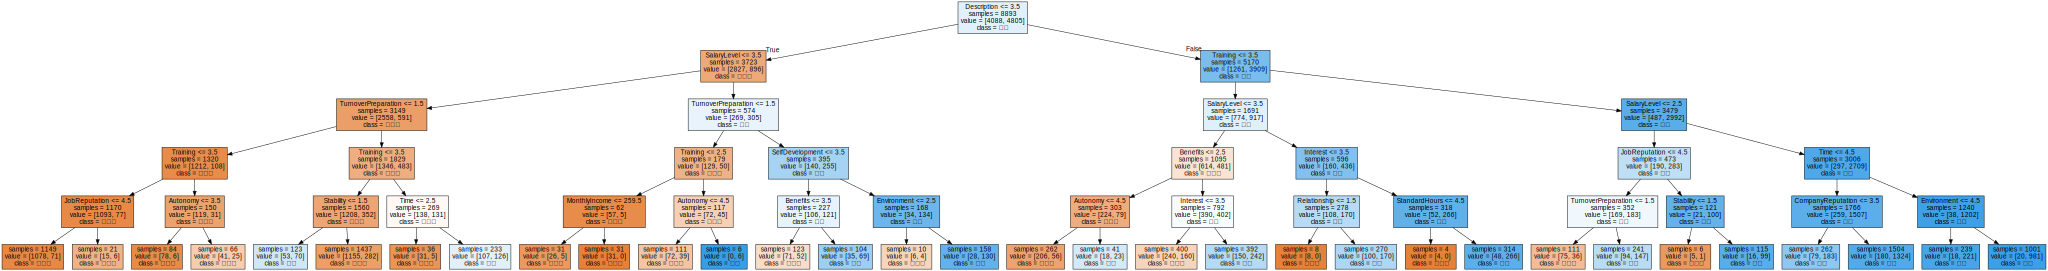

In [ ]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=['불만족','만족'], feature_names=df.columns[:-1], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

변수의 중요도:
 [0.00000000e+00 0.00000000e+00 2.84257541e-03 0.00000000e+00
 0.00000000e+00 4.04383864e-04 1.28175197e-01 1.85533073e-02
 5.76653103e-01 2.27833033e-03 1.48837840e-02 6.77790686e-03
 3.08904880e-03 1.66667480e-02 0.00000000e+00 9.52381112e-03
 1.01903397e-02 7.39964346e-03 1.69078838e-02 1.37324567e-01
 4.83293706e-02]
변수의 중요도:
 [0.00000000e+00 0.00000000e+00 2.84257541e-03 0.00000000e+00
 0.00000000e+00 4.04383864e-04 1.28175197e-01 1.85533073e-02
 5.76653103e-01 2.27833033e-03 1.48837840e-02 6.77790686e-03
 3.08904880e-03 1.66667480e-02 0.00000000e+00 9.52381112e-03
 1.01903397e-02 7.39964346e-03 1.69078838e-02 1.37324567e-01
 4.83293706e-02]


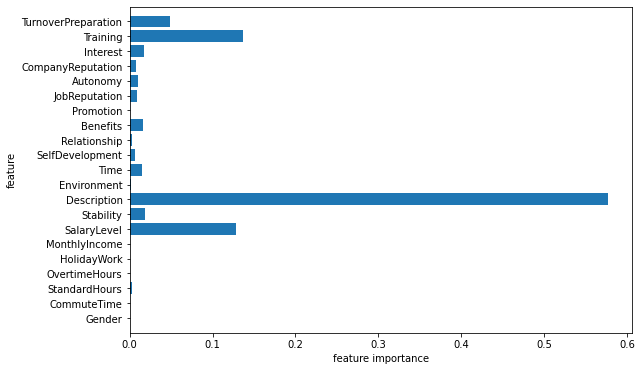

In [ ]:
# 중요 변수 파악하기

result = tree.feature_importances_
print("변수의 중요도:\n", result)

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df.columns[0:21])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns[0:21])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

result = tree.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_df(tree)

# (2) 앙상블 모델 - 랜덤 포레스트


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


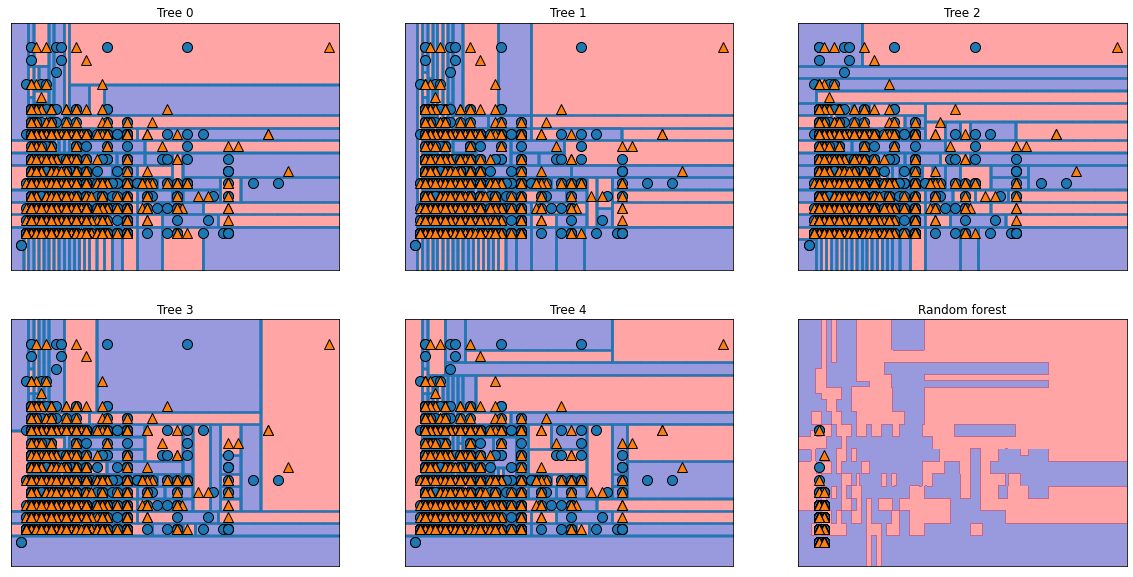

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 3:5], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mg.plots.plot_tree_partition(X.iloc[:, 3:5].values, y, tree, ax=ax)
    
mg.plots.plot_2d_separator(forest, X.iloc[:, 3:5].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mg.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
# 변수를 모두 이용하여 100개의 나무 생성

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.811


변수의 중요도:
 [0.01728654 0.0181114  0.04276648 0.04084267 0.02356341 0.09088352
 0.08073755 0.03624016 0.09173056 0.035897   0.04277135 0.05270412
 0.03999781 0.0398777  0.0408676  0.03771939 0.0400423  0.04910405
 0.07825926 0.07182251 0.02877461]


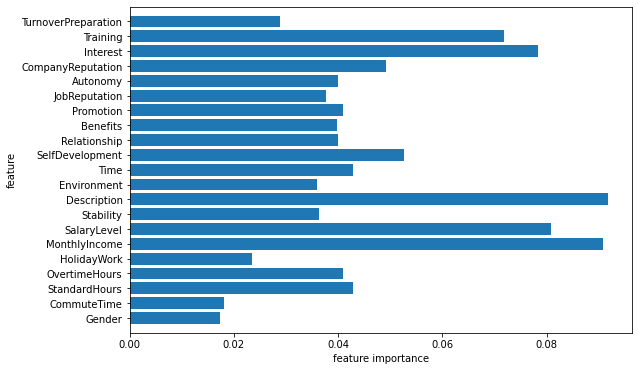

In [ ]:
# 중요 변수 파악하기

result = forest.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_df(forest)

# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨

🔹 의사결정나무와 랜덤 포레스트 비교

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.74831461 0.73258427 0.7505618  0.73790776 0.74015748 0.72778403
 0.75028121 0.74690664 0.7480315  0.7424072 ]
Random forest:  [0.81797753 0.82247191 0.82696629 0.79752531 0.83014623 0.81552306
 0.8447694  0.81327334 0.81102362 0.81664792]
Accuracy mean
Decision tree :0.742
Random forest :0.820


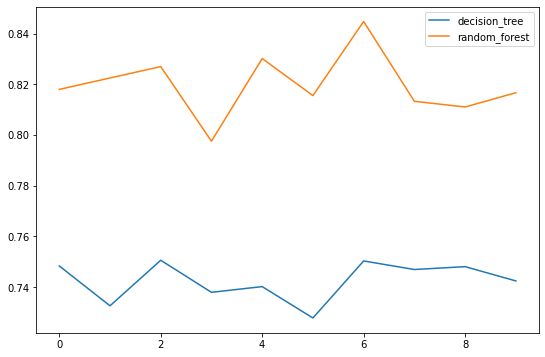

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
dfg = pd.DataFrame.from_dict(dict(cv_list))
dfg.plot()

🔹 랜덤 포레스트의 정확도가 의사결정나무보다 높게 나타난다.

# (3) 앙상블 모델 - 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 : max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.841
시험용 데이터 세트 정확도: 0.825


변수의 중요도:
 [0.01728654 0.0181114  0.04276648 0.04084267 0.02356341 0.09088352
 0.08073755 0.03624016 0.09173056 0.035897   0.04277135 0.05270412
 0.03999781 0.0398777  0.0408676  0.03771939 0.0400423  0.04910405
 0.07825926 0.07182251 0.02877461]


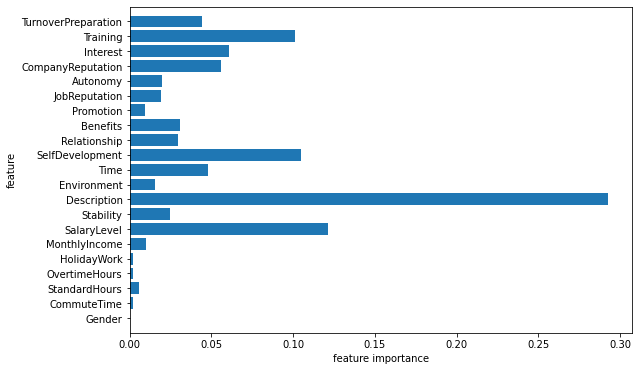

In [ ]:
# 중요 변수 파악하기

result = forest.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_df(gbrt)

# 3. 평가

# 교차검증


In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.74831461 0.73258427 0.7505618  0.73790776 0.74015748 0.72778403
 0.75028121 0.74690664 0.7480315  0.7424072 ]
Random forest:  [0.81797753 0.82247191 0.82696629 0.79752531 0.83014623 0.81552306
 0.8447694  0.81327334 0.81102362 0.81664792]
Gradient boosting:  [0.81573034 0.81797753 0.83483146 0.82227222 0.83577053 0.83014623
 0.8503937  0.80764904 0.81552306 0.81552306]
Accuracy mean
Decision tree :0.742
Random forest :0.820
Gradient boosting :0.825


In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.742
Random forest :0.820
Gradient boosting :0.825


# 그리드 서치: 최적의 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters_dt = {'max_depth':[1,2,3,4,5]}
parameters_rf = {'max_depth':[1,2,3,4,5]}
parameters_gbrt = {'max_depth':[1,2,3,4,5], 'learning_rate':[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]}

In [ ]:
init_tree = DecisionTreeClassifier(random_state=0)
grid_tree = GridSearchCV(init_tree, param_grid=parameters_dt, cv=10, refit=True)

grid_tree.fit(X_train, y_train)

scores_df_t = pd.DataFrame(grid_tree.cv_results_)
scores_df_t[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'max_depth': 1},0.757450,5,0.762921,0.760674,0.747191
1,{'max_depth': 2},0.761497,4,0.774157,0.760674,0.752809
2,{'max_depth': 3},0.779715,3,0.775281,0.774157,0.782022
3,{'max_depth': 4},0.781287,2,0.787640,0.784270,0.789888
4,{'max_depth': 5},0.793769,1,0.798876,0.793258,0.805618


In [ ]:
init_forest = RandomForestClassifier(random_state=0)
grid_forest = GridSearchCV(init_forest, param_grid=parameters_rf, cv=10, refit=True)

grid_forest.fit(X_train, y_train)

scores_df_f = pd.DataFrame(grid_forest.cv_results_)
scores_df_f[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'max_depth': 1},0.784325,5,0.795506,0.780899,0.776404
1,{'max_depth': 2},0.797367,4,0.808989,0.797753,0.802247
2,{'max_depth': 3},0.803889,3,0.807865,0.807865,0.811236
3,{'max_depth': 4},0.811310,2,0.819101,0.819101,0.814607
4,{'max_depth': 5},0.815360,1,0.811236,0.817978,0.819101


In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters_gbrt, cv=10, refit=True)
print(grid_gbrt)

grid_gbrt.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.09, 0.08, 0.07, 0.06, 0.05,
                                           0.04, 0.03, 0.02, 0.01],
                         'max_depth': [1, 2, 3, 4, 5]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.816147,33,0.823596,0.811236,0.816854
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.821321,23,0.810112,0.822472,0.825843
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.824582,8,0.815730,0.817978,0.834831
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.823457,18,0.812360,0.817978,0.835955
4,"{'learning_rate': 0.1, 'max_depth': 5}",0.823907,13,0.819101,0.823596,0.824719
5,"{'learning_rate': 0.09, 'max_depth': 1}",0.816147,33,0.825843,0.812360,0.813483
6,"{'learning_rate': 0.09, 'max_depth': 2}",0.820646,24,0.811236,0.822472,0.823596
7,"{'learning_rate': 0.09, 'max_depth': 3}",0.825819,1,0.817978,0.820225,0.830337
8,"{'learning_rate': 0.09, 'max_depth': 4}",0.822557,19,0.816854,0.822472,0.829213
9,"{'learning_rate': 0.09, 'max_depth': 5}",0.824019,12,0.819101,0.819101,0.835955


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_tree.best_params_)
print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최적 파라미터: {'learning_rate': 0.09, 'max_depth': 3}


# (1) 정오분류표


정확도 Accuracy

🔷 그래디언트 부스팅 모델의 정확도가 가장 높게 나타난다. (0.825)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test의 0,1 분포

grid_tree_pred = grid_tree.predict(X_test)
grid_forest_pred = grid_forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_tree_pred)))
print(confusion_matrix(y_test, grid_tree_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_forest_pred)))
print(confusion_matrix(y_test, grid_forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

1    1607
0    1358
Name: Satisfaction, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.787
[[ 999  359]
 [ 274 1333]]
Random forest 시험용 데이터 세트 정확도:0.808
[[1085  273]
 [ 296 1311]]
Gradient boosting 시험용 데이터 세트 정확도:0.825
[[1111  247]
 [ 273 1334]]


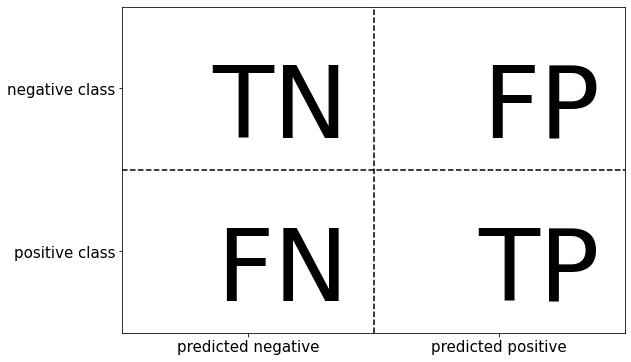

In [ ]:
mg.plots.plot_binary_confusion_matrix()

정밀도 Precision, 재현율 Recall, f1-measure

In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree:")
print(classification_report(y_test, grid_tree_pred, target_names=["0", "1"]))
print("Random Forest:")
print(classification_report(y_test, grid_forest_pred, target_names=["0", "1"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["0", "1"]))

Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1358
           1       0.79      0.83      0.81      1607

    accuracy                           0.79      2965
   macro avg       0.79      0.78      0.78      2965
weighted avg       0.79      0.79      0.79      2965

Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1358
           1       0.83      0.82      0.82      1607

    accuracy                           0.81      2965
   macro avg       0.81      0.81      0.81      2965
weighted avg       0.81      0.81      0.81      2965

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1358
           1       0.84      0.83      0.84      1607

    accuracy                           0.82      2965
   macro avg       0.82      0.82      0.82      2965
weighted avg       0.82  

# (2) ROC (Receiver Operator Characteristic) 곡선과 AUC (Area Under the Curve)

🔷 그래디언트 부스팅 모델의 AUC가 가장 크게 나타난다. (0.889)

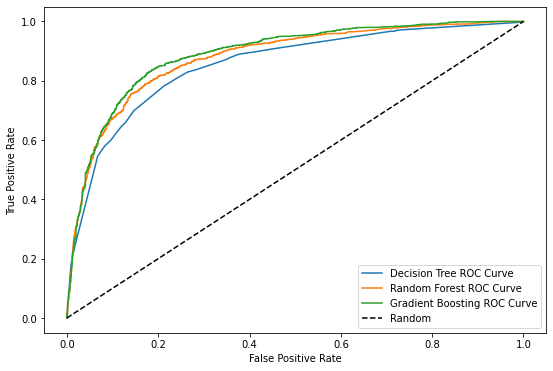

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, grid_tree.predict_proba(X_test)[:, 1], pos_label=1)
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, grid_forest.predict_proba(X_test)[:, 1], pos_label=1)
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [ ]:
auc_dt = roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, grid_forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.853
Random Forest의 AUC: 0.879
Gradient Boosting의 AUC: 0.889


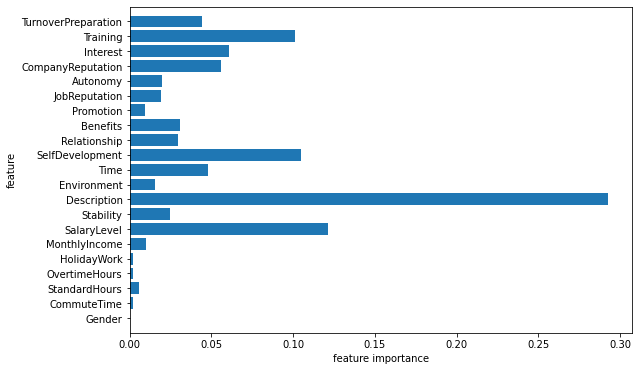

In [ ]:
plot_feature_importances_df(gbrt)

# **🏅 그래디언트 부스팅 모델 채택**

# 3. 인사이트

**(1) 사내 이직 기회 확대**

> 변수 간 연관성 분석 결과,
중요 변수로 도출되었던 Description이 Interest와 높은 수준의 상관관계를 가지고 있음을 확인할 수 있다.

> → **개개인의 적성과 흥미를 고려하는 방안**이 직장에 대한 만족도를 제고하고, 나아가 ‘조용한 사직’을 해결하는 데 있어서 효과적일 것으로 기대한다.

In [ ]:
# 상관관계 분석

corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,Gender,CommuteTime,StandardHours,OvertimeHours,HolidayWork,MonthlyIncome,SalaryLevel,Stability,Description,Environment,...,Relationship,Benefits,Promotion,JobReputation,Autonomy,CompanyReputation,Interest,Training,TurnoverPreparation,Satisfaction
Gender,1.00,0.04,-0.15,-0.10,-0.04,-0.19,-0.10,-0.06,-0.05,-0.01,...,-0.06,-0.05,-0.10,-0.04,-0.06,-0.03,-0.04,-0.07,-0.06,-0.05
CommuteTime,0.04,1.00,0.01,0.03,0.01,0.00,-0.06,-0.04,-0.03,-0.01,...,-0.01,-0.04,-0.05,-0.01,-0.03,-0.01,-0.02,-0.04,-0.06,-0.06
StandardHours,-0.15,0.01,1.00,0.15,0.09,0.41,-0.01,0.09,-0.04,-0.03,...,0.01,0.08,0.05,0.04,-0.04,0.04,0.01,0.03,0.08,-0.00
OvertimeHours,-0.10,0.03,0.15,1.00,0.36,0.11,-0.07,-0.01,-0.05,-0.08,...,-0.05,-0.05,-0.05,-0.03,-0.09,-0.04,-0.03,-0.04,-0.01,-0.07
HolidayWork,-0.04,0.01,0.09,0.36,1.00,0.03,-0.05,-0.04,-0.06,-0.10,...,-0.07,-0.05,-0.04,-0.06,-0.08,-0.06,-0.05,-0.05,-0.04,-0.07
MonthlyIncome,-0.19,0.00,0.41,0.11,0.03,1.00,0.20,0.17,0.05,0.06,...,0.08,0.18,0.14,0.15,0.07,0.16,0.09,0.10,0.11,0.13
SalaryLevel,-0.10,-0.06,-0.01,-0.07,-0.05,0.20,1.00,0.41,0.46,0.43,...,0.38,0.50,0.52,0.44,0.42,0.44,0.39,0.47,0.21,0.44
Stability,-0.06,-0.04,0.09,-0.01,-0.04,0.17,0.41,1.00,0.45,0.45,...,0.43,0.54,0.49,0.48,0.43,0.50,0.39,0.47,0.22,0.35
Description,-0.05,-0.03,-0.04,-0.05,-0.06,0.05,0.46,0.45,1.00,0.63,...,0.56,0.47,0.50,0.58,0.62,0.57,0.70,0.61,0.23,0.49
Environment,-0.01,-0.01,-0.03,-0.08,-0.10,0.06,0.43,0.45,0.63,1.00,...,0.56,0.54,0.48,0.55,0.56,0.54,0.53,0.56,0.17,0.43


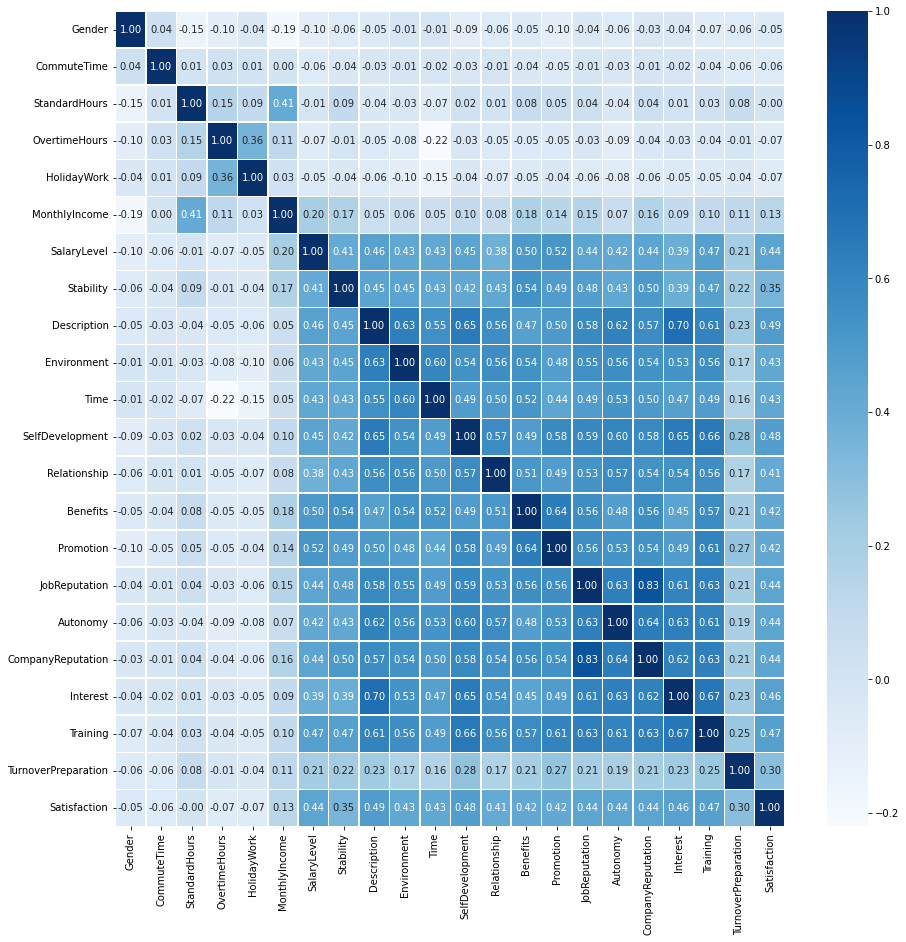

In [ ]:
# 시각화

plt.figure(figsize=(15,15))
sns.heatmap(data = corr_df, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

따라서, 사내 이직 기회의 확대를 제안한다.

**사내 이직제도: 직원 스스로 다른 계열사에 지원해 이동할 수 있는 제도**

🔹 사내 이직제도가 직원에게 도움이 될 것이라고 생각한 직장인은 10명 중 8명 (이직제도에 대한 생각 조사, 인크루트, 2022.)


1.   소속을 유지한 상태에서 원하는 진로나 직무를 스스로 재선택할 수 있어서 (39.9%)
2.   다양한 업무를 경험하고 싶어서 (25.3%)
3.   매너리즘에 빠지지 않고 롱런할 수 있을 것 같아서(16.5%)

*   사내 부서 이동의 기회의 폭을 넓혀 취업자들이 **개인의 적성과 흥미**에 맞는 **직무**를 스스로 선택하여 일할 수 있도록 해야 할 것이다.

*   기업 입장에서도 자사에 대해 잘 알고 있는, 회사에 대한 이해도가 높은 직원을 채용할 수 있고, 우수한 인재의 타기업으로의 이탈 또한 막을 수 있으므로 기업의 생산성 향상도 기대할 수 있다.


**(2) 유연근무제 도입**


🔹 유연근무제의 예시 

*   시차출퇴근제: 주 5일 근무와 소정근로시간 (1일 8시간, 주 40시간)을 준수하면서 출퇴근 시간을 조정
*   선택근무제: 1개월 이내의 정산기간을 평균하여 1주 평균 근로시간이 주 40시간을 초과하지 않는 범위에서 1주 또는 1일 근무시간을 자유롭게 조정

잡코리아의 연구결과에 따르면, **직장 내 자발적으로 무엇인가 선택할 수 있는 권한을 부여받았을 때** 일과 직장에 대한 만족도가 높아진다고 한다. 

퇴근 후 시간을 이용해 자기계발을 하는 샐러던트(Salaryman+Student)들이 늘어남에 따라, 유연근무제도의 도입으로 하여금 출퇴근시간에 대한 선택권을 부여한다면 자발성과 **개인의 발전 가능성**을 도모할 수 있고, 이는 직장 만족도 향상으로 이어질 것이다.

**(3) 더 많은 OJT 기회 제공**
* 기업 맞춤형 현장 훈련 지원 사업  
  http://www.mtnews.net/news/view.php?idx=13122
* 외국 기업에서 배울 수 있는 해외 연수 기회 제공  
  https://www.hankyung.com/economy/article/2022120558801
* 회사 내부에서 전문가를 찾아 주기적으로 세미나 진행

> 더 **효과적인 교육**을 제공하기 위해 주기적으로 사원들이 어떤 분야에 대해 배우고 싶어하는지 조사하고, 더 나은 성과를 얻기 위해 필요한 스킬을 찾아 **훈련의 기회**를 제공해줄 수 있다.

🔹 훈련 형태 제안

*   집합 교육이나 사이버 교육
*   성과가 좋은 사원에게 학위나 자격증을 얻을 수 있도록 지원해주는 방법




**(4) 의사결정의 과정 참여 독려**

회사에 들어가서 큰 프로젝트의 작은 일부분을 맡다 보면, 현재 자신이 무엇을 하고 있는지, 왜 이것을 하는지 모르는 상태로 그저 시키는 일을 하다 보니 현재 하고 있는 일에 의문을 가지게 된다는 말을 들어본 적이 있을 것이다.  
> 이를 해결할 수 있도록 어느정도 실력이 확인된 사원에게 조금 더 **큰 범위의 의사결정 과정에 참여할 수 있도록 기회를 제공**해주는 것이 사원의 직장 만족에 좋은 영향을 미칠 것이다.


*   의사결정 과정에 참여하는 것을 통해 현재 하는 일이 어떠한 과정과 이유로 결정되었고, 왜 이 일을 해야 하는지 이해할 수 있는 시간이 되기 때문에 자신의 일과 직장에 애착을 가질 수 있게 도와줄 것이다.  
*   개인의 역량에 맞춰 프로젝트의 중요한 부분에 의사결정 권한을 부여해 책임감과 실력을 기를 수 있도록 한다.
